<a href="https://colab.research.google.com/github/mohcineelharras/daml_project/blob/main/project/daml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAML Poject

## Context

Les critères suivants seront appréciés :
* Compte-rendu : clarté et pertinence des explications, qualité de la présentation (en particulier les équations), analyse et interprétation des résultats ;
* Travail fourni : conformité aux objectifs précisés dans le texte, quantité
et qualité des résultats et conclusions ;
* Initiative et originalité.


**Présenter (avec synthèse) l’algorithme k-means et les algorithmes EM et CEM appliqués au modèle de mélange gaussien.**

## Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
import seaborn as sns, numpy as np
from sklearn.neighbors import KernelDensity
import numpy as np
import numpy as np
import pandas as pd
from shapely.geometry import Polygon, Point
import random
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import pandas as pd
import io
import requests
from sklearn.utils import resample

## Simulation

1. Simulation d’un modèle de mélange :

* Écrire une fonction qui simule n points du plan suivant un modèle
de mélange de deux lois gaussiennes définies par leurs proportions,
centres, volumes, formes et orientations.
* Donner quelques exemples de simulation et donner les représentations
graphiques correspondantes.





> $g({\boldsymbol  {x}},{\boldsymbol  {\Phi }})=\sum _{{k=1}}^{g}\pi _{k}f({\boldsymbol  {x}},{\boldsymbol  {\theta }}_{k}) $





### Construct gmm pdf

In [ ]:
def normal_dist(x , mean , sd):
  prob_density = (1/(2*np.pi*sd**2)) * np.exp(-0.5*((x-mean)/sd)**2)
  return prob_density

def gmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2):
  # Creating a series of gaussian data
  x1 = np.random.normal(mu1, sigma1, int(n*pi1))
  x2 = np.random.normal(mu2,  sigma2, int(n*pi2))
  # Creating a series of x for the plot
  #x = np.linspace(min(x1.min(),x2.min()),max(x1.max(),x2.max()),1000)

  #Apply function to the data.
  pdf1 = normal_dist(x,mu1,sigma1)
  pdf2 = normal_dist(x,mu2,sigma2)
  #gmm
  pdf3= pi1*pdf1 + pi2*pdf2
  return pdf1,pdf2,pdf3
def plotgmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2):
  pdf1,pdf2,pdf3=gmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2)
  #Plotting the Results
  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(x,pdf1*pi1 , color = 'red',label="mu1="+str(mu1)+", sigma1="+str(sigma1)+", pi1="+str(pi1))
  ax.plot(x,pdf2*pi2 , color = 'blue',label="mu2="+str(mu2)+", sigma2="+str(sigma2)+", pi1="+str(pi2))
  #ax.plot(x,pdf3 , color = 'green',label=str(pi1)+"N(mu1="+str(mu1)+",sigma1="+str(sigma1)+")+"+str(pi2)+"N(mu2="+str(mu2)+",sigma2="+str(sigma2)+")")
  ax.plot(x,pdf3 , color = 'green',label=str(pi1)+"N1+"+str(pi2)+"N2")
  plt.xlabel('Data points')
  plt.ylabel('Probability Density')
  ax.legend()

Config 1 :

$\ N(mu_{1}=0 ,\sigma_{1}=0.1) ; \pi_{1} = 0.4  ; $

$\ N(mu_{2}= 0.2,\sigma_{2}=0.2) ; \pi_{2} =  0.6 ;$

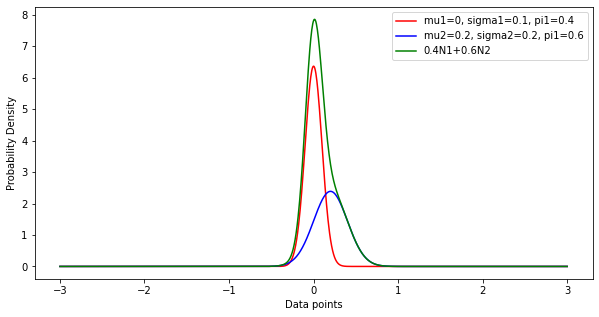

In [ ]:
x=np.linspace(-3,3,1000)
plotgmm2(x,n=1000,mu1=0,sigma1=0.1,pi1=0.4,mu2=0.2,sigma2=0.2,pi2=0.6)

Config 2 :

$\ N(mu_{1}= ,\sigma_{1}=) ; \pi_{1} = 0.2  ; $

$\ N(mu_{2}= ,\sigma_{2}=) ; \pi_{2} =  0.8 ;$

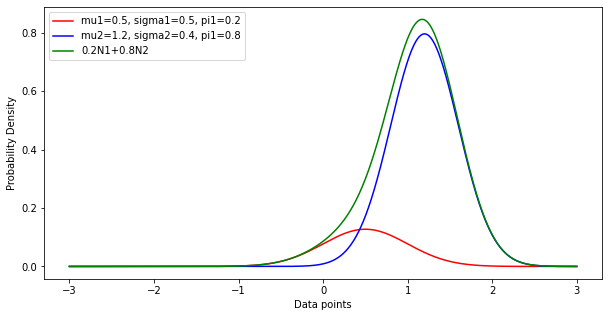

In [ ]:
x=np.linspace(-3,3,1000)
plotgmm2(x,n=1000,mu1=0.5,sigma1=0.5,pi1=0.2,mu2=1.2,sigma2=0.4,pi2=0.8)

### Generate simulated Data from pdf

In [ ]:
n=100000
x=np.linspace(-3,3,1000)
pdf1,pdf2,pdf3 = gmm2(x,n=n,mu1=0,sigma1=0.1,pi1=0.4,mu2=0.2,sigma2=0.2,pi2=0.6)

poly = Polygon([(x.min(), pdf3.min()), (x.max(), pdf3.min()), (x.max(), pdf3.max()),(x.min(), pdf3.max())])
min_x, min_y, max_x, max_y = poly.bounds


In [ ]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
       random_point = Point([random.uniform(min_x, max_x),  random.uniform(min_y, max_y)])
       if (random_point.within(poly)):
           points.append(random_point)
    return points


In [ ]:
points = random_points_within(poly, 10000)
#sampled data points 
xs = [point.x for point in points]
ys = [point.y for point in points]


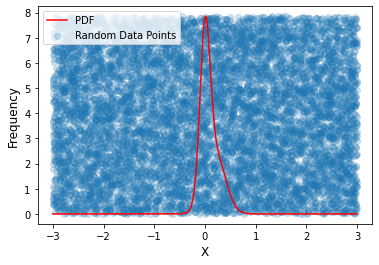

In [ ]:
plt.scatter(xs, ys,alpha=0.2, label='Random Data Points')
plt.plot(x,pdf3,color='r',label='PDF')
plt.xlabel('X', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.legend()


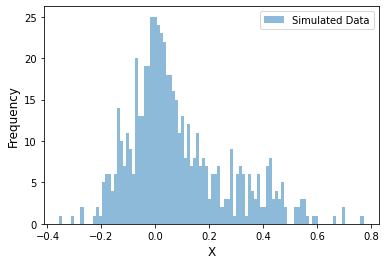

In [ ]:
df = pd.DataFrame({'xs':xs,'ys':ys},index=None)

#using a list
l = []
for i in range(len(df)):
  if df.loc[i,'ys']<gmm2(df.loc[i,'xs'],n=n,mu1=0,sigma1=0.1,pi1=0.4,mu2=0.2,sigma2=0.2,pi2=0.6)[2]:
    l.append([df.loc[i,'xs']])
under_curve = np.asarray(l)

#plotting the results
plt.hist(under_curve,bins=100,alpha=0.5, label='Simulated Data')
plt.xlabel('X', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.legend()


### Redetermine 2 gaussian pdfs

In [ ]:
import numpy as np
from sklearn import mixture
np.random.seed(1)
g = mixture.GaussianMixture(n_components=2)
# Generate random observations with two modes centered on 0
# and 10 to use for training.
g.fit(under_curve) 

print("N1",np.round(g.means_, 3)[0],np.round(g.covariances_, 3)[0])
print("N2",np.round(g.means_, 3)[1],np.round(g.covariances_, 3)[1])



N1 [0.001] [[0.01]]
N2 [0.344] [[0.02]]


### Construct gmm with built-in function sklearn

(1000, 2)


array([0, 1])

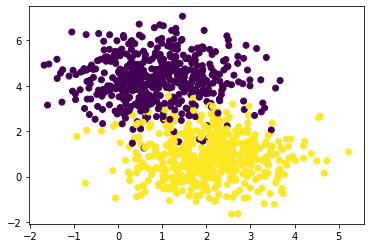

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=0)
print(X.shape)
plt.scatter(X[:,0],X[:,1],c=y)
np.unique(y)

array([1.12031365, 5.75806083])

## Conditional Expectation Maximization (CEM)

* Programmer l’algorithme CEM pour les modèles parcimonieux [π,λI],
[πk, λI], [π, λkI] et [πk, λkI].

## Comparaison de CEM avec K-means

**Comparer votre algorithme et l’algorithme des kmeans sur des jeux de données simulées et réelles.**


Pour les données réelles, vous pouvez choisir (en motivant ce choix) une application et un jeu de données parmi ceux proposés sur le site web :
      http://archive.ics.uci.edu/ml/datasets.php

* Le jeu de données choisi est **Online Shoppers Purchasing Intention Dataset Data Set**

In [ ]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))



* Pour les données simulées, on comparera tout d’abord les deux algorithmes lorsque les classes sont très séparées (err ≈ 0.05 c.à.d. chevauchement des classes de 5%); pour cela, on étudiera des situations correspondant à des proportions égales, différentes ou très différentes et des situations correspondant à des volumes égaux, différents ou très différents. 
* On fera les mêmes comparaisons lorsque les classes sont moyennement séparées (err ≈ 0.15) et très séparées (err ≈ 0.30). 

### err = 0.05 chevauchement des classes de 5%

#### Proportions égales

#### Proportions différentes

#### Proportions très différentes

### err = 0.15 chevauchement des classes de 15%

### err = 0.3 chevauchement des classes de 30%

## Apprentissage Supervisé (classement ou classification)
* Comment peut-on utiliser les modèles de mélange pour faire de l’apprentissage supervisé (classement)? Illustrer votre réponse par une application de votre choix. 

**On peut estimer la densité de probabilité en calculant la moyenne empirique et la variance empirique pour chaque classe et ensuite on aura accès à la loi gaussienne de chaque classe ce qui permettra d'estimer la probabilité d'appartenance d'un point dans l'espace à cette classe là**

* Proposer ainsi une autre méthode d’apprentissage supervisé, la Présenter (avec synthèse) et la comparer avec les modèles de mélange.


**Les algorithmes d'apprentissage supervisé choisis sont la régression logistique et le réseau de neurone de perceptron.**

### Logistic regression

#### Simple Dataset

**Import and split data**

In [99]:
X, y = make_blobs(n_samples=10000, centers=2, n_features=2,
                  random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)


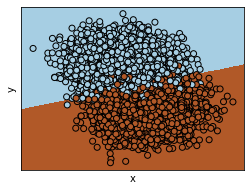

In [100]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

##### Training DataSet

In [101]:
y_pred=logreg.predict(X_train)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_train, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_train, y_pred, average=None))
from sklearn.metrics import f1_score
print(f1_score(y_train, y_pred, average='macro'))


[[4075  151]
 [ 165 4109]]
0.9628235294117647
[0.96426881 0.96139448]
[0.96108491 0.96455399]
0.962822934578718


##### Testing DataSet

In [102]:
y_pred=logreg.predict(X_test)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))


[[736  38]
 [ 24 702]]
0.9586666666666667
[0.95090439 0.96694215]
[0.96842105 0.94864865]
0.9586454196022489


-3.3859047217471088


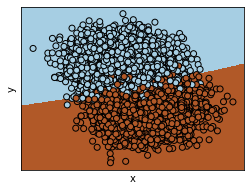

In [103]:
clf = mixture.GaussianMixture(n_components=2)
clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [104]:
y_pred=clf.predict(X_test)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))


[[737  37]
 [ 24 702]]
0.9593333333333334
[0.95219638 0.96694215]
[0.96846255 0.94993234]
0.9593111805316228


#### Chosen Dataset

**Import and split dataset**

In [105]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_dummies=pd.get_dummies(df)
print(df_dummies.shape)
# Separate majority and minority classes
df_majority = df_dummies[df_dummies.Revenue==0]
df_minority = df_dummies[df_dummies.Revenue==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=10422,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])



X=df_upsampled.drop("Revenue",axis=1)
y=df_upsampled["Revenue"]
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

(12330, 29)
(20844, 28) (20844,)


##### Training DataSet

In [106]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred=logreg.predict(X_train)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_train, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_train, y_pred, average=None))
from sklearn.metrics import f1_score
print(f1_score(y_train, y_pred, average='macro'))

[[7903  933]
 [2320 6561]]
0.8163910368572558
[0.89440923 0.73876816]
[0.77306075 0.8755004 ]
0.8153314965300599


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Testing DataSet

In [107]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred=logreg.predict(X_test)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))

[[1416  170]
 [ 394 1147]]
0.8196354333226735
[0.89281211 0.74432187]
[0.78232044 0.87091875]
0.8182907318617136


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [108]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X_train,y_train)

y_pred=gmm.predict(X_test)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))

[[ 565 1021]
 [ 487 1054]]
0.5177486408698433
[0.35624212 0.68397145]
[0.53707224 0.50795181]
0.5056597080115668


### Create GMM supervised Learning algorithme

#### Simple Dataset

In [109]:
#---------------------------------------------------------------------------
X, y = make_blobs(n_samples=10000, centers=2, n_features=2,random_state=0)
df=pd.DataFrame(X)
df["y"]=y

#***************************************************************************
#---------------------------------------------------------------------------
df_false=df[df.y==0]
X_false=df_false.drop("y",axis=1)
y_false=df_false["y"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.2, random_state=42)
#---------------------------------------------------------------------------
n_false=X_false_train.shape[0]
mu_false=np.array((1/n_false)*X_false_train.sum(axis=0))
cov_false=(1/n_false)*np.transpose(np.array(X_false_train-mu_false))@(np.array(X_false_train-mu_false))

#***************************************************************************
#---------------------------------------------------------------------------
df_true=df[df.y==1]
X_true=df_true.drop("y",axis=1)
y_true=df_true["y"]
print(X_true.shape,y_true.shape)
#---------------------------------------------------------------------------
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(
    X_true, y_true, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_true=X_true_train.shape[0]
mu_true=np.array((1/n_true)*X_true_train.sum(axis=0))
cov_true=(1/n_true)*np.transpose(np.array(X_true_train-mu_true))@(np.array(X_true_train-mu_true))

(5000, 2) (5000,)


##### Training DataSet

In [110]:
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
false_dist=K_false.pdf(np.array(X_false_train))
#plt.hist(false_dist)

K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
true_dist=K_true.pdf(np.array(X_false_train))
#plt.hist(true_dist)

pddf=pd.DataFrame(np.array(y_false_train),columns=["y_false_train"])
pddf["false_dist"] = np.array(false_dist)
pddf["true_dist"] = np.array(true_dist)
pddf["decision"]=np.array(pddf["true_dist"]>pddf["false_dist"],dtype=int)
pddf["test"]=pddf["decision"]==pddf["y_false_train"]
pddf.test.value_counts()/pddf.shape[0]

True     0.96325
False    0.03675
Name: test, dtype: float64

In [111]:
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
false_dist=K_false.pdf(np.array(X_true_train))
#plt.hist(false_dist)

K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
true_dist=K_true.pdf(np.array(X_true_train))
#plt.hist(true_dist)

pddf=pd.DataFrame(np.array(y_true_train),columns=["y_true_train"])
pddf["false_dist"] = np.array(false_dist)
pddf["true_dist"] = np.array(true_dist)
pddf["decision"]=np.array(pddf["true_dist"]>pddf["false_dist"],dtype=int)
pddf["test"]=pddf["decision"]==pddf["y_true_train"]
pddf.test.value_counts()/pddf.shape[0]

True     0.959403
False    0.040597
Name: test, dtype: float64

##### Testing DataSet

In [112]:
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false)
false_dist=K_false.pdf(np.array(X_false_test))
#plt.hist(false_dist)

K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true)
true_dist=K_true.pdf(np.array(X_false_test))
#plt.hist(true_dist)

pddf=pd.DataFrame(np.array(y_false_test),columns=["y_false_test"])
pddf["false_dist"] = np.array(false_dist)
pddf["true_dist"] = np.array(true_dist)
pddf["decision"]=np.array(pddf["true_dist"]>pddf["false_dist"],dtype=int)
pddf["test"]=pddf["decision"]==pddf["y_false_test"]
pddf.test.value_counts()/pddf.shape[0]

True     0.964
False    0.036
Name: test, dtype: float64

In [113]:
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false)
false_dist=K_false.pdf(np.array(X_true_test))
#plt.hist(false_dist)

K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true)
true_dist=K_true.pdf(np.array(X_true_test))
#plt.hist(true_dist)

pddf=pd.DataFrame(np.array(y_true_test),columns=["y_true_test"])
pddf["false_dist"] = np.array(false_dist)
pddf["true_dist"] = np.array(true_dist)
pddf["decision"]=np.array(pddf["true_dist"]>pddf["false_dist"],dtype=int)
pddf["test"]=pddf["decision"]==pddf["y_true_test"]
pddf.test.value_counts()/pddf.shape[0]

True     0.966061
False    0.033939
Name: test, dtype: float64

-3.605571377719644 6.495318442052676 -3.849416383020006 8.784120625130054


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

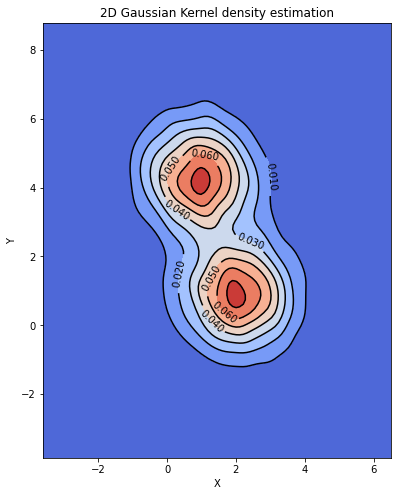

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

# Extract x and y
x = np.array(X)[:,0]
y = np.array(X)[:,1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')


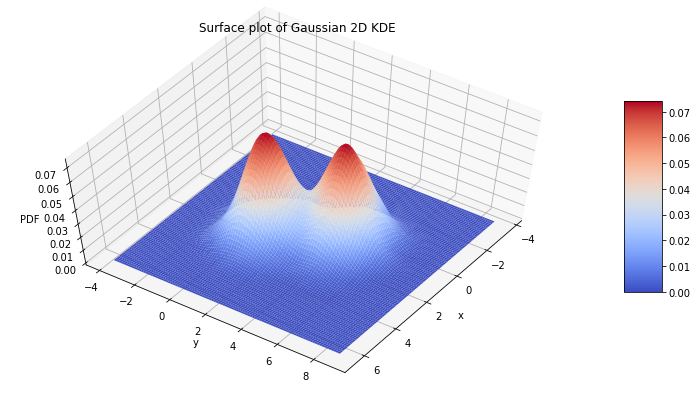

In [115]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)


We must compare the two density for a x value and decide $\lambda_{np} $

#### Chosen Dataset

In [116]:
#---------------------------------------------------------------------------
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_dummies=pd.get_dummies(df)

#***************************************************************************
#---------------------------------------------------------------------------
df_false=df_dummies[df_dummies.Revenue==False]
X_false=df_false.drop("Revenue",axis=1)
y_false=df_false["Revenue"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_false=X_false_train.shape[0]
mu_false=np.array((1/n_false)*X_false_train.sum(axis=0))
cov_false=(1/n_false)*np.transpose(np.array(X_false_train-mu_false))@(np.array(X_false_train-mu_false))

#***************************************************************************
#---------------------------------------------------------------------------
df_true=df_dummies[df_dummies.Revenue==True]
# Upsample minority class
df_true = resample(df_true, replace=True,
                                 n_samples=10422,random_state=123)
X_true=df_true.drop("Revenue",axis=1)
y_true=df_true["Revenue"]
#---------------------------------------------------------------------------
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(
    X_true, y_true, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_true=X_true_train.shape[0]
mu_true=np.array((1/n_true)*X_true_train.sum(axis=0))
cov_true=(1/n_true)*np.transpose(np.array(X_true_train-mu_true))@(np.array(X_true_train-mu_true))

##### Training DataSet

In [117]:
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
false_dist=K_false.pdf(np.array(X_false_train))
#plt.hist(false_dist)

K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
true_dist=K_true.pdf(np.array(X_false_train))
#plt.hist(true_dist)

pddf=pd.DataFrame(np.array(y_false_train),columns=["y_false_train"])
pddf["false_dist"] = np.array(false_dist)
pddf["true_dist"] = np.array(true_dist)
pddf["decision"]=np.array(pddf["true_dist"]>pddf["false_dist"],dtype=int)
pddf["test"]=pddf["decision"]==pddf["y_false_train"]
pddf.test.value_counts()/pddf.shape[0]

True     0.802922
False    0.197078
Name: test, dtype: float64

In [118]:
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
false_dist=K_false.pdf(np.array(X_true_train))
#plt.hist(false_dist)

K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
true_dist=K_true.pdf(np.array(X_true_train))
#plt.hist(true_dist)

pddf=pd.DataFrame(np.array(y_true_train),columns=["y_true_train"])
pddf["false_dist"] = np.array(false_dist)
pddf["true_dist"] = np.array(true_dist)
pddf["decision"]=np.array(pddf["true_dist"]>pddf["false_dist"],dtype=int)
pddf["test"]=pddf["decision"]==pddf["y_true_train"]
pddf.test.value_counts()/pddf.shape[0]

True     0.607133
False    0.392867
Name: test, dtype: float64

##### Testing DataSet

In [119]:
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
false_dist=K_false.pdf(np.array(X_false_test))
#plt.hist(false_dist)

K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
true_dist=K_true.pdf(np.array(X_false_test))
#plt.hist(true_dist)

pddf=pd.DataFrame(np.array(y_false_test),columns=["y_false_test"])
pddf["false_dist"] = np.array(false_dist)
pddf["true_dist"] = np.array(true_dist)
pddf["decision"]=np.array(pddf["true_dist"]>pddf["false_dist"],dtype=int)
pddf["test"]=pddf["decision"]==pddf["y_false_test"]
pddf.test.value_counts()/pddf.shape[0]

True     0.79564
False    0.20436
Name: test, dtype: float64

In [120]:
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
false_dist=K_false.pdf(np.array(X_true_test))
#plt.hist(false_dist)

K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
true_dist=K_true.pdf(np.array(X_true_test))
#plt.hist(true_dist)

pddf=pd.DataFrame(np.array(y_true_test),columns=["y_true_test"])
pddf["false_dist"] = np.array(false_dist)
pddf["true_dist"] = np.array(true_dist)
pddf["decision"]=np.array(pddf["true_dist"]>pddf["false_dist"],dtype=int)
pddf["test"]=pddf["decision"]==pddf["y_true_test"]
pddf.test.value_counts()/pddf.shape[0]

True     0.599128
False    0.400872
Name: test, dtype: float64

### Draft

In [121]:
import numpy as np
from sklearn.decomposition import PCA
X = df_dummies.drop("Revenue",axis=1)
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

X_2d=pca.transform(X)
X_2d.shape

[0.98773508 0.00754396]
[212713.93809794  18589.83476165]


(12330, 2)

In [122]:
y_false.shape,y_true.shape

((10422,), (10422,))

-7606.799784940152 69302.91703587568 -993.1784282326578 2760.778538659335


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

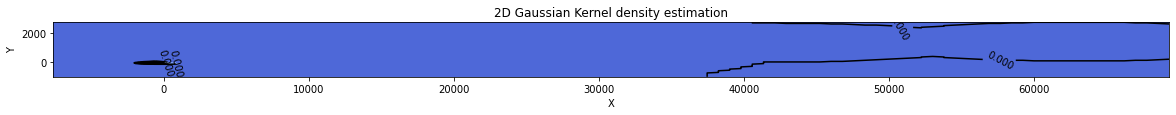

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

# Extract x and y
x = np.array(X_2d)[:,0]
y = np.array(X_2d)[:,1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(20,20))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')


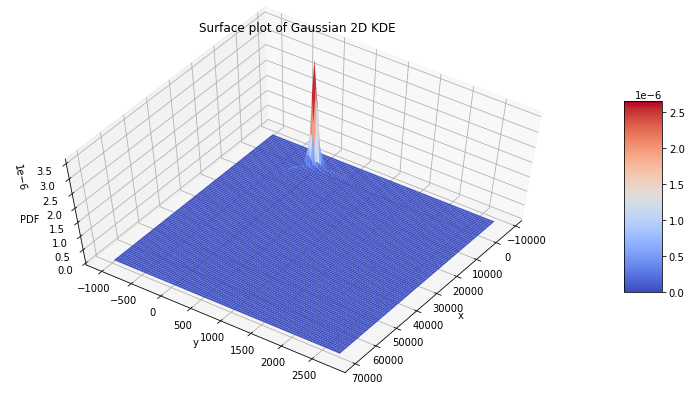

In [124]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
